<a href="https://colab.research.google.com/github/thnahphung/ML/blob/main/Lab_4_20130099_DuongThanhPhung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import metrics as m
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

[1 0 1 2 0 2 1 0 0 2 1 2 2 2 2 2 2 2 2 0 2 2 0 0 1 1 1 0 1 1 0 0 1 2 0 0 2
 2 0 1 0 2 0 1 0]
Confusion: [[16  0  0]
 [ 0 12  1]
 [ 0  0 16]]
Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1: 0.9777777777777777
Accuracy: 0.9777777777777777


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


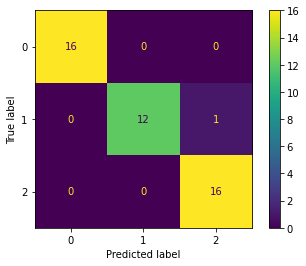

In [3]:
data4 = datasets.load_iris()
x = data4.data
y = data4.target
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.3)
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
ps1 = m.precision_score(y_test, y_pred, average='micro')
rs1 = m.recall_score(y_test,y_pred, average='micro')
f1 = m.f1_score(y_test, y_pred, average='micro')
as1 = m.accuracy_score(y_test, y_pred)
cf1 = m.confusion_matrix(y_test,y_pred)
print(y_pred)
print('Confusion:',cf1)
print('Precision:', ps1)
print('Recall:', rs1)
print('F1:', f1)
print('Accuracy:', as1)
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



[2 4 9 7 6 8 4 1 6 0 1 4 1 5 4 1 6 3 8 9 7 7 5 8 4 0 4 4 9 4 5 3 3 0 7 2 1
 3 4 9 0 7 9 0 6 1 2 3 1 5 1 0 4 9 6 2 5 1 6 1 2 0 7 5 1 5 3 0 6 9 7 9 5 6
 0 4 8 5 2 9 1 4 2 0 4 6 3 3 3 6 3 0 7 1 2 5 4 7 5 7 1 0 1 4 4 0 8 9 7 2 9
 8 6 5 3 4 1 5 1 8 0 6 8 5 7 0 6 6 7 9 2 7 5 9 4 3 3 1 5 0 9 0 3 5 8 2 2 7
 7 9 3 1 0 0 6 2 2 6 9 0 2 8 9 4 5 4 8 3 8 6 7 0 0 2 3 5 0 0 1 4 6 7 6 9 9
 7 2 6 5 5 6 6 7 0 1 4 5 0 8 3 8 6 7 6 7 4 6 9 4 9 9 9 7 0 8 6 3 3 4 2 8 8
 9 5 8 9 7 4 9 4 4 7 5 2 1 7 2 7 8 8 1 4 3 6 3 4 7 8 6 5 7 9 4 2 1 9 3 7 1
 4 1 5 4 3 8 2 8 9 0 0 0 9 0 1 0 3 4 7 1 9 6 1 7 5 4 4 7 5 9 1 7 5 0 4 5 9
 5 7 8 8 4 9 1 0 9 6 7 1 4 7 8 7 6 2 5 7 2 5 0 9 9 0 3 2 5 1 3 6 4 6 2 2 3
 8 4 8 3 5 9 3 2 2 4 4 7 4 8 8 6 9 3 8 0 1 8 1 4 5 5 1 2 0 0 3 9 8 6 1 0 1
 9 7 8 5 2 0 5 6 9 3 4 1 2 9 7 3 9 4 9 5 1 1 7 2 7 7 7 3 7 1 2 5 5 8 4 3 2
 8 8 0 3 0 7 8 1 4 6 0 1 3 6 8 8 6 3 1 9 2 7 2 3 9 4 3 1 3 0 9 3 3 7 7 7 1
 3 0 1 3 1 4 5 9 1 3 0 5 0 8 6 1 6 8 2 8 5 3 0 4 3 7 8 5 3 3 6 6 3 3 7 1 7
 3 6 3 0 3 3 6 5 7 3 9 9 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


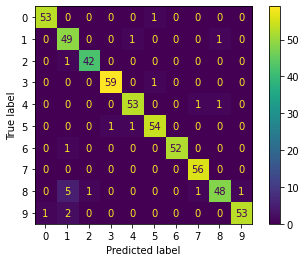

In [9]:
mnist = datasets.load_digits()
x2 = mnist.data
y2 = mnist.target
x_train_2, x_test_2, y_train_2, y_test_2 = tts(x2,y2,test_size=0.3)
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_2, y_train_2)
y_pred_2 = classifier.predict(x_test_2)
ps2 = m.precision_score(y_test_2, y_pred_2, average='micro')
rs2 = m.recall_score(y_test_2,y_pred_2, average='micro')
f2 = m.f1_score(y_test_2, y_pred_2, average='micro')
as2 = m.accuracy_score(y_test_2, y_pred_2)
cf2 = m.confusion_matrix(y_test_2,y_pred_2)
print(y_pred_2)
print('Confusion:',cf2)
print('Precision:', ps2)
print('Recall:', rs2)
print('F1:', f2)
print('Accuracy:', as2)
ConfusionMatrixDisplay.from_estimator(classifier, x_test_2, y_test_2)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [11]:
from sklearn.neighbors import KNeighborsClassifier

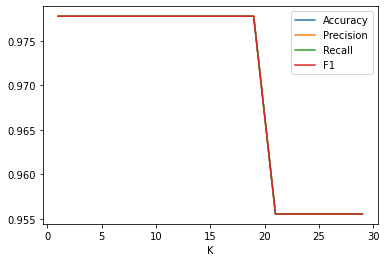

In [7]:
k_range = np.arange(1,30,2)
accs =[]
precision = []
recalls =[]
f1 = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  accs.append(m.accuracy_score(y_test, pred))
  precision.append(m.precision_score(y_test, pred, average='micro'))
  recalls.append( m.recall_score(y_test, pred, average='micro'))
  f1.append(m.f1_score(y_test, pred, average='micro'))

plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


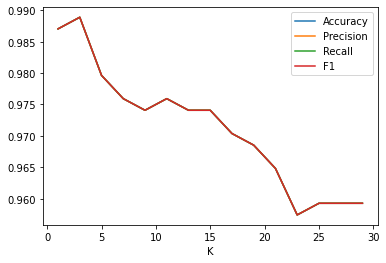

In [17]:
accuracy = []
precision = []
recall = []
f1 = []
k_range = range(1, 30, 2)
for k in k_range:
  Knn = KNeighborsClassifier(n_neighbors= k)
  Knn.fit(x_train_2, y_train_2)
  pred = Knn.predict(x_test_2)
  accuracy.append(m.accuracy_score(y_test_2, pred))
  precision.append(m.precision_score(y_test_2, pred, average= 'micro'))
  recall.append(m.recall_score(y_test_2, pred, average= 'micro'))
  f1.append(m.f1_score(y_test_2, pred, average= 'micro'))

plt.plot(k_range, accuracy, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [18]:
# code
d_KNN = {'Accuracy':max(accuracy), 'Precision':max(precision), 'Recall':max(recall), 'F1': max(f1)}
d_Logictis =  {'Accuracy': m.accuracy_score(y_test, y_pred), 'Precision': m.precision_score(y_test, y_pred, average='micro'), 'Recall': m.recall_score(y_test, y_pred, average='micro'), 'F1': m.f1_score(y_test, y_pred, average='micro')}
pd.DataFrame({'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis)})

,KNN,Logictis Regression
Accuracy,0.988889,0.977778
Precision,0.988889,0.977778
Recall,0.988889,0.977778
F1,0.988889,0.977778


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [19]:
data = pd.read_csv('spambase.csv')
x_train_5, x_test_5, y_train_5, y_test_5 = tts(data.iloc[:, :58].values, data[['class']], test_size=0.3, random_state=1)
classifier.fit(x_train_5, y_train_5)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

[0 0 1 ... 1 0 0]
Accuracy: 0.9840695148443157
Precision: 0.9850187265917603
Recall: 0.9740740740740741
F1: 0.9795158286778398
[[833   8]
 [ 14 526]]


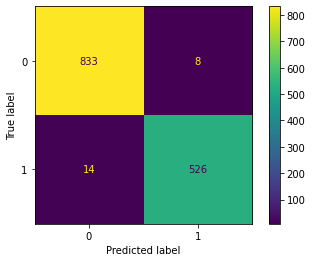

In [20]:
y_pred = classifier.predict(x_test_5)
print(y_pred)
logistic_ac = m.accuracy_score(y_test_5, y_pred)
logistic_ps = m.precision_score(y_test_5, y_pred)
logistic_rs = m.recall_score(y_test_5,y_pred)
logistic_fs = m.f1_score(y_test_5, y_pred)
print('Accuracy:', logistic_ac)
print('Precision:', logistic_ps)
print('Recall:', logistic_rs)
print('F1:', logistic_fs)
print(m.confusion_matrix(y_test_5, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test_5, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

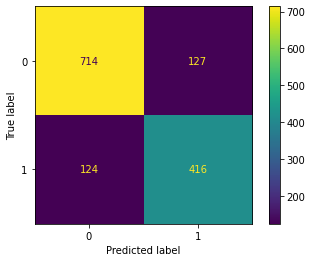

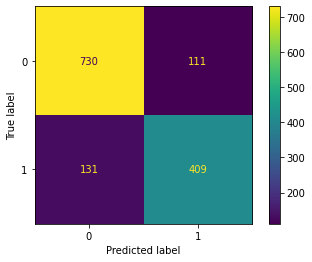

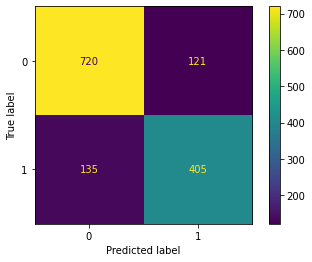

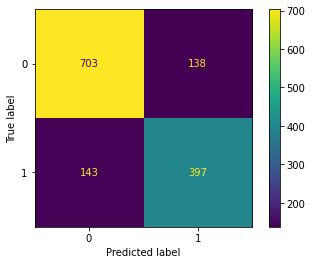

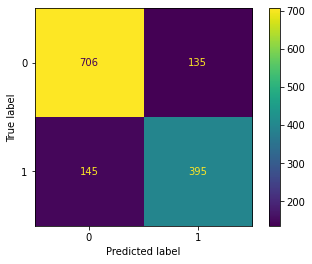

In [21]:
k_range = range(1, 10, 2)
KNN_ac = []
KNN_ps = []
KNN_rs = []
KNN_fs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train_5, y_train_5)
  y_pred = KNN.predict(x_test_5)
  KNN_ac.append(m.accuracy_score(y_test_5, y_pred))
  KNN_ps.append(m.precision_score(y_test_5, y_pred))
  KNN_rs.append(m.recall_score(y_test_5, y_pred))
  KNN_fs.append(m.f1_score(y_test_5, y_pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test_5, y_pred)

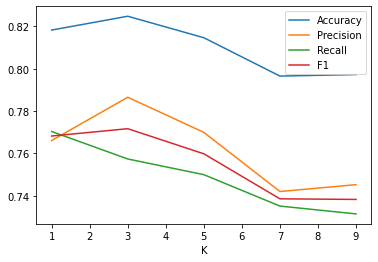

In [22]:
plt.plot(k_range, KNN_ac, label='Accuracy')
plt.plot(k_range, KNN_ps, label='Precision')
plt.plot(k_range, KNN_rs, label='Recall')
plt.plot(k_range, KNN_fs, label='F1')
plt.xlabel('K')
plt.legend()

In [25]:
decision_tree = tree.DecisionTreeClassifier(random_state=50)
decision_tree.fit(x_train_5, y_train_5)

DecisionTreeClassifier(random_state=50)

[1 1 1 ... 1 0 0]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


[Text(0.5, 0.75, 'x[57] <= 0.5\ngini = 0.478\nsamples = 3220\nvalue = [1947, 1273]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1947\nvalue = [1947, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1273\nvalue = [0, 1273]')]

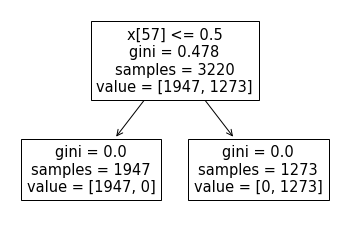

In [26]:
y_pred = decision_tree.predict(x_test_5)
print(y_pred)
tree_ac = m.accuracy_score(y_test_5, y_pred)
tree_ps = m.precision_score(y_test_5, y_pred)
tree_rs = m.recall_score(y_test_5,y_pred)
tree_fs = m.f1_score(y_test_5, y_pred)
print('Accuracy:', tree_ac)
print('Precision:', tree_ps)
print('Recall:', tree_rs)
print('F1:', tree_fs)
tree.plot_tree(decision_tree)

In [27]:
d_KNN = {'Accuracy':max(KNN_ac), 'Precision':max(KNN_ps), 'Recall':max(KNN_rs), 'F1': max(KNN_fs)}
d_Logictis =  {'Accuracy': logistic_ac, 'Precision': logistic_ps, 'Recall': logistic_rs, 'F1': logistic_fs}
d_tree = {'Accuracy': tree_ac, 'Precision': tree_ps, 'Recall': tree_rs, 'F1': tree_fs}
pd.DataFrame({'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis), 'Decision Tree': pd.Series(d_tree)})

,KNN,Logictis Regression,Decision Tree
Accuracy,0.824765,0.984070,1.0
Precision,0.786538,0.985019,1.0
Recall,0.770370,0.974074,1.0
F1,0.771698,0.979516,1.0


#Finally,
Save a copy in your Github. Remember renaming the notebook.